# Unit 14. CNN Model
### MNIST 손글씨 사례

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

- 모델 정의

In [2]:
model = Sequential([ 
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [3]:
model2 = Sequential([ 
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), strides=(2,2), activation='relu'),
    MaxPooling2D(pool_size=2),       # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               295040    
                                                      

- 모델 설정

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path = 'best-mnist-cnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

- 학습 데이터 준비

In [6]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# X data: 0~1 사이의 값, 3차원 --> 4차원
X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.

In [8]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 학습 및 평가

In [9]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[checkpoint, early_stop], verbose=0
)


Epoch 1: val_loss improved from inf to 0.06038, saving model to best-mnist-cnn.h5

Epoch 2: val_loss improved from 0.06038 to 0.04687, saving model to best-mnist-cnn.h5

Epoch 3: val_loss improved from 0.04687 to 0.03873, saving model to best-mnist-cnn.h5

Epoch 4: val_loss improved from 0.03873 to 0.03872, saving model to best-mnist-cnn.h5

Epoch 5: val_loss improved from 0.03872 to 0.03482, saving model to best-mnist-cnn.h5

Epoch 6: val_loss improved from 0.03482 to 0.03374, saving model to best-mnist-cnn.h5

Epoch 7: val_loss did not improve from 0.03374

Epoch 8: val_loss did not improve from 0.03374

Epoch 9: val_loss did not improve from 0.03374

Epoch 10: val_loss improved from 0.03374 to 0.03264, saving model to best-mnist-cnn.h5

Epoch 11: val_loss did not improve from 0.03264

Epoch 12: val_loss did not improve from 0.03264

Epoch 13: val_loss did not improve from 0.03264

Epoch 14: val_loss did not improve from 0.03264

Epoch 15: val_loss did not improve from 0.03264

Epoc

In [10]:
from tensorflow.keras.models import load_model

best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0308 - accuracy: 0.9912


[0.03082697093486786, 0.9911999702453613]

- 학습과정 시각화

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

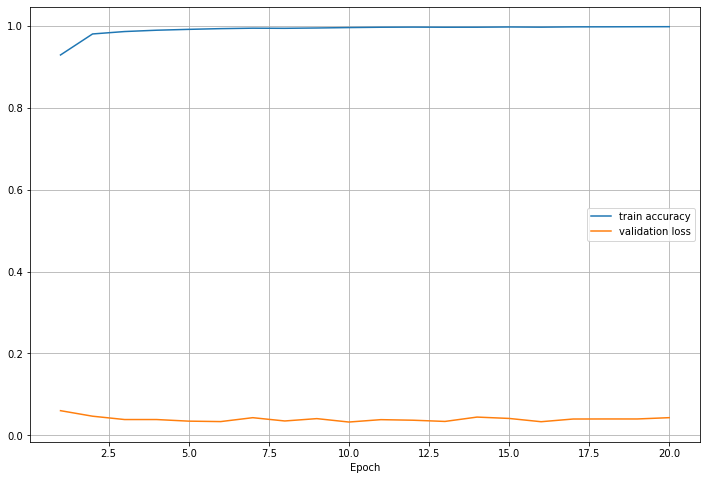

In [13]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()